In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#############
### Problem 1

In [3]:
nSet = np.array([1,2,3,5,10,30])
thetaSet = np.array([1,5,50,100])

In [4]:
ntSet = np.zeros((nSet.size*thetaSet.size,2), dtype='int8')
index: int = 0
for n in nSet:
    for theta in thetaSet:
        ntSet[index] = [n, theta]
        index += 1

In [5]:
def Q1_solver(N, ntSet, rtype='print'):
    # create sample sets
    if rtype == 'table':
        table_mle = np.zeros((nSet.size,thetaSet.size), dtype='float')
        table_moment = np.zeros((nSet.size,thetaSet.size), dtype='float')
        
    for nt in ntSet:
        # replicate for N times
        n = nt[0]
        theta = nt[1]
        mleSet = np.zeros(N+1, dtype='float')
        momentSet = np.zeros(N+1, dtype='float')
        mse_mleCum = 0
        mse_momentCum = 0
        # Monte Carlo simulation
        for i in range(N):
            data = np.random.uniform(0,theta,n)
            # mleSet build
            mleSet[n] = np.max(data)
            mse_mleCum += np.square(mleSet[n] - theta)/N
            # momentSet build
            momentSet[n] = 2*np.mean(data)
            mse_momentCum += np.square(momentSet[n] - theta)/N
            
        # Monte_carlo finish
        if rtype == 'print':
            print('n: ',n, 'theta: ',theta)
            print('MSE of MLE Estimator: ',mse_mleCum)
            print('MSE of Moment Estimator ', mse_momentCum)
            print()
            
        elif rtype == 'table':
            table_mle[np.where(nSet==n), np.where(thetaSet==theta)] = mse_mleCum
            table_moment[np.where(nSet==n), np.where(thetaSet==theta)] = mse_momentCum
    # End     
    if rtype == 'table':
        print('MSE of MLE Estimator:')
        print(pd.DataFrame(table_mle, columns=['theta = %d' %tt for tt in thetaSet], index=['n = %d' %nn for nn in nSet]))
        print()
        print('MSE of Moment Estimator:')
        print(pd.DataFrame(table_moment, columns=['theta = %d' %tt for tt in thetaSet], index=['n = %d' %nn for nn in nSet]))
        
        # graph output
        import seaborn as sns
        ax = pd.DataFrame(table_mle, columns=['theta = %d' %tt for tt in thetaSet], index=['n = %d' %nn for nn in nSet]).plot.line()
        ax.set(ylabel='Mean Square Estimation', xlabel='full-line: MLE Estimator'+'\n'+'dot-line: Moment Estimator')
        pd.DataFrame(table_moment, columns=['theta = %d' %tt for tt in thetaSet], index=['n = %d' %nn for nn in nSet]).plot(
            kind='line', ax=ax, style='--', title='MSE of two different Estimator')
        
        

MSE of MLE Estimator:
        theta = 1  theta = 5  theta = 50  theta = 100
n = 1    0.325017   8.899696  860.546013  3278.242314
n = 2    0.161444   4.084279  401.809646  1649.105327
n = 3    0.100394   2.528011  240.635412   958.825627
n = 5    0.052079   1.304845  117.286471   517.667640
n = 10   0.014808   0.361052   33.733382   158.474923
n = 30   0.002032   0.052460    5.003943    18.620282

MSE of Moment Estimator:
        theta = 1  theta = 5  theta = 50  theta = 100
n = 1    0.342105   8.452384  879.244751  3322.703100
n = 2    0.161924   4.154668  425.327555  1602.435059
n = 3    0.113913   2.821286  270.165806  1159.200780
n = 5    0.065699   1.683942  161.055709   680.820830
n = 10   0.032957   0.822851   76.158278   336.476303
n = 30   0.010647   0.261292   26.936872   103.110259


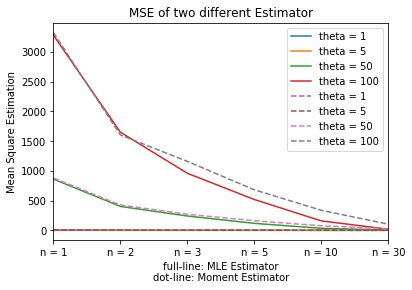

In [6]:
Q1_solver(1000, ntSet, rtype='table')

In [7]:
### Prob2

In [8]:
# P2.b
xSet = np.array([21.72, 14.65, 50.42, 28.78, 11.23])
myTheta = np.array([5/np.sum(np.log(xSet))])
myTheta

array([0.32338742])

In [9]:
# P2.c
from scipy.optimize import minimize
import math

def f(t):
    tmp = 1
    xSet =  np.array([21.72, 14.65, 50.42, 28.78, 11.23])
    for x in xSet:
        if x < 1:
            tmp *= 0
        else:
            tmp *= t/(x**(t+1))
    return tmp
# res = minimize(f, inp, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})
res = minimize(f, np.array([1]), method='nelder-mead')
res

 final_simplex: (array([[52.15      ],
       [52.15009766]]), array([0., 0.]))
           fun: 0.0
       message: 'Optimization terminated successfully.'
          nfev: 73
           nit: 28
        status: 0
       success: True
             x: array([52.15])

In [10]:
t2 = res.x

def compute(t):
    tmp = 1
    for x in xSet:
        if x < 1:
            tmp *= 0
        else:
            tmp *= t/(x**(t+1))
    print('t: ', t,' and function minimum value is ', tmp)
#     print('t: %d and function minimum value is %d' %t %tmp)

compute(myTheta)
compute(t2)

t:  [0.32338742]  and function minimum value is  [4.59591893e-12]
t:  [52.15]  and function minimum value is  [0.]


In [11]:
# P2.d
def f_compute(X):
    x = np.zeros(np.shape(X), dtype='float')
    for i in range(len(X)):
        x[i] = t2/(X[i]**(t2+1))
    return x
fSet = f_compute(xSet)
print(fSet)

# st Error = standard deviation / sqrt(n)
stError =  np.std(fSet)/np.sqrt(np.size(fSet))
stError

[4.60420690e-70 5.66219159e-61 1.67460852e-89 1.46750249e-76
 7.75479403e-55]


1.3872194755429191e-55

In [12]:
print('95% CI for theta is: [{}, {}]'.format(np.mean(fSet)-1,96*stError, np.mean(fSet)+1.96*stError))

95% CI for theta is: [-1.0, 1.3317306965212023e-53]
